<a href="https://colab.research.google.com/github/aashish10raj/GFG_21Projects_Course/blob/main/Project9/9_Advanced_Vision_AI_Fast_Tracking_Image_Classification_with_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning with Pre-trained Models on CIFAR-100

## Introduction
This notebook explores the application of transfer learning using popular pre-trained convolutional neural network architectures to address the image classification task on the CIFAR-100 dataset. Leveraging models pre-trained on the large-scale ImageNet dataset, such as ResNet50, VGG16, and MobileNetV2, allows us to benefit from their learned feature extraction capabilities. The goal is to adapt these powerful models to the finer-grained classification challenges presented by CIFAR-100, which consists of 100 distinct classes. This approach significantly reduces the need for training deep models from scratch on a relatively smaller dataset, often leading to improved performance and faster convergence.

## Project Flow

1.  **Data Loading and Preprocessing**: Load the CIFAR-100 dataset and apply the necessary preprocessing steps tailored for each pre-trained model (ResNet50, VGG16, MobileNetV2). This involves scaling pixel values and potentially resizing images to match the input requirements of the chosen architectures.

2.  **Model Preparation**:
    *   Load pre-trained models (ResNet50, VGG16, MobileNetV2) without their top classification layers.
    *   Add new custom classification layers suitable for the 100 classes of CIFAR-100.
    *   Freeze the layers of the pre-trained base models to retain the learned features during initial training.
    *   Compile the models with an appropriate optimizer, loss function, and metrics.

3.  **Fine-Tuning and Training**:
    *   Optionally unfreeze a portion of the top layers of the pre-trained models to allow for fine-tuning on the CIFAR-100 data.
    *   Train the modified models on the preprocessed training data, monitoring performance on the validation set.

4.  **Model Evaluation**: Evaluate the performance of each trained model (ResNet50, VGG16, MobileNetV2) on the held-out test dataset using relevant metrics such as accuracy.

5. **Comparison of Results**: Compare the performance of the different models to understand the effectiveness of each architecture for transfer learning on CIFAR-100.

## 1. Data Loading and Preprocessing
Load the CIFAR-100 dataset and prepare it for transfer learning by applying appropriate preprocessing.

In [16]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet50
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mobilenetv2

(X_train, y_train), (X_test, y_test) = cifar100.load_data()

X_train_resnet50 = preprocess_resnet50(X_train)
X_test_resnet50 = preprocess_resnet50(X_test)

X_train_vgg16 = preprocess_vgg16(X_train)
X_test_vgg16 = preprocess_vgg16(X_test)

X_train_mobilenetv2 = preprocess_mobilenetv2(X_train)
X_test_mobilenetv2 = preprocess_mobilenetv2(X_test)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


## 2. Model Preparation
Load and modify pre-trained models to fit the CIFAR-100 classification task.

### 2.1 Using ResNet50

In [17]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained ResNet50 model without the top layer
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

x = GlobalAveragePooling2D()(base_model_resnet50.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x)

model_resnet50 = Model(inputs=base_model_resnet50.input, outputs=predictions)

model_resnet50.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 2.2 Using VGG16

In [18]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained VGG16 model without the top layer
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# Add new layers
x = GlobalAveragePooling2D()(base_model_vgg16.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x)
model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=predictions)

model_vgg16.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 2.3 Using MobileNetV2

In [19]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained MobileNetV2 model without the top layer
base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# Add new layers
x = GlobalAveragePooling2D()(base_model_mobilenetv2.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x)
model_mobilenetv2 = Model(inputs=base_model_mobilenetv2.input, outputs=predictions)

model_mobilenetv2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/tmp/ipython-input-3794676327.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


## 3. Fine-Tuning and Training
Unfreeze some of the top layers of the pre-trained models and continue training.

In [20]:
epochs = 3

print(len(model_resnet50.layers))
print(len(model_vgg16.layers))
print(len(model_mobilenetv2.layers))


# Fine-tuning ResNet50
for layer in model_resnet50.layers[:-30]:
    layer.trainable = False

for layer in model_resnet50.layers[-30:]:
    layer.trainable = True

history_resnet50    = model_resnet50.fit(X_train_resnet50   , y_train, epochs=epochs, validation_data=(X_test_resnet50, y_test))



# Fine-tuning VGG16
for layer in model_vgg16.layers[:-5]:
    layer.trainable = False

for layer in model_vgg16.layers[-5:]:
    layer.trainable = True

history_vgg16       = model_vgg16.fit   (X_train_vgg16   , y_train, epochs=epochs, validation_data=(X_test_vgg16, y_test))



# Fine-tuning MobileNetV2
for layer in model_mobilenetv2.layers[:-40]:
    layer.trainable = False

for layer in model_mobilenetv2.layers[-40:]:
    layer.trainable = True

history_mobilenetv2 = model_mobilenetv2.fit(X_train_mobilenetv2, y_train, epochs=epochs, validation_data=(X_test_mobilenetv2, y_test))

178
22
157
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 0.2791 - loss: 3.0810 - val_accuracy: 0.3962 - val_loss: 2.3686
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.4603 - loss: 2.0141 - val_accuracy: 0.4219 - val_loss: 2.4622
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 14ms/step - accuracy: 0.6282 - loss: 1.3110 - val_accuracy: 0.4232 - val_loss: 2.8526
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.0599 - loss: 6.5971 - val_accuracy: 0.0306 - val_loss: 4.2471
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.0358 - loss: 4.2195 - val_accuracy: 0.0451 - val_loss: 3.9957
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.0510 - loss: 3.9416 - val_accuracy: 0.0694 - val_loss: 3.7762
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 22ms/step - accuracy: 0.1359 - loss: 3.8007 - val_accuracy: 0.1012 - val_loss: 4.9158
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.2619

## 4. Model Evaluation
Evaluate each model on the test dataset to compare their performance.

In [21]:
acc_resnet50    = model_resnet50.evaluate(X_test_resnet50, y_test)[1]
acc_vgg16       = model_vgg16.evaluate(X_test_vgg16, y_test)[1]
acc_mobilenetv2 = model_mobilenetv2.evaluate(X_test_mobilenetv2, y_test)[1]

print(f'ResNet50 Accuracy: {acc_resnet50:.2f}')
print(f'VGG16 Accuracy: {acc_vgg16:.2f}')
print(f'MobileNetV2 Accuracy: {acc_mobilenetv2:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4309 - loss: 2.8222
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.0691 - loss: 3.7810
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2756 - loss: 3.2858
ResNet50 Accuracy: 0.42
VGG16 Accuracy: 0.07
MobileNetV2 Accuracy: 0.27


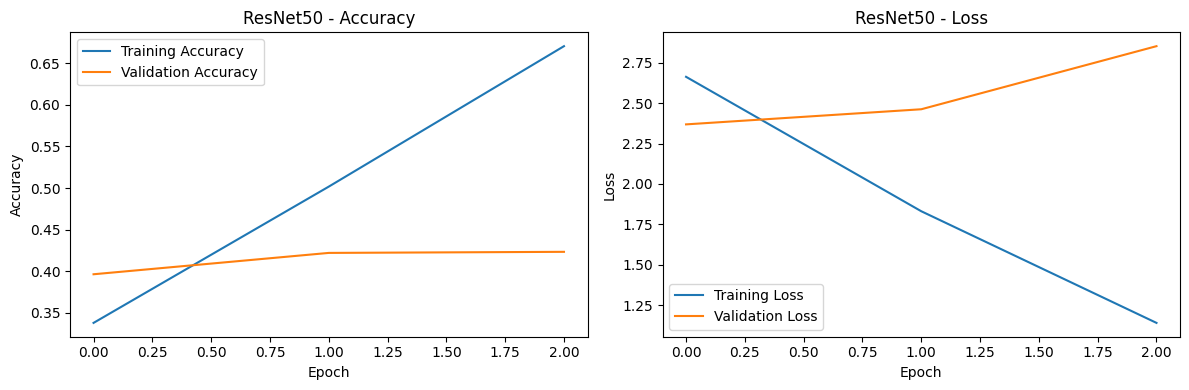

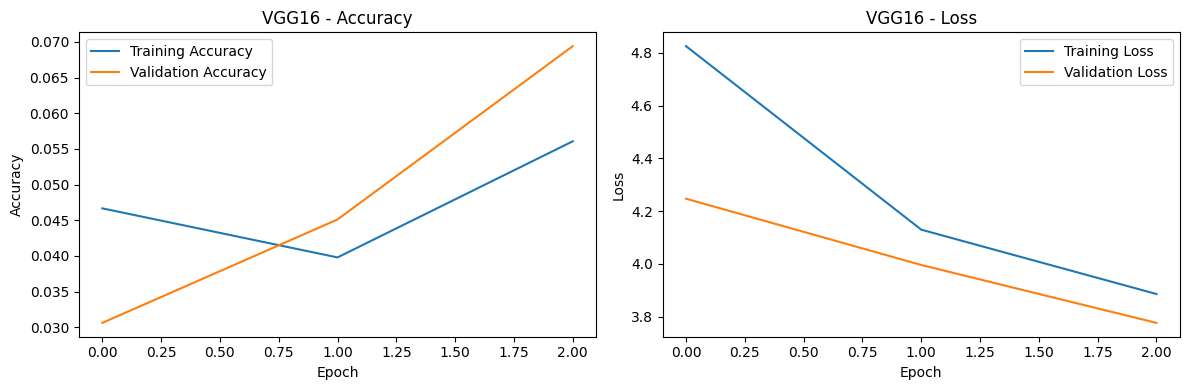

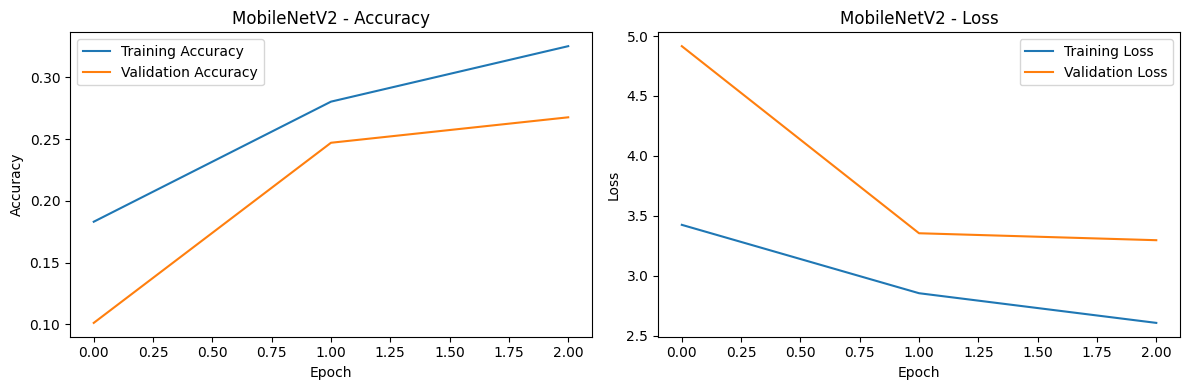

In [22]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    """Plots training and validation accuracy and loss."""
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot history for each model
plot_history(history_resnet50, 'ResNet50')
plot_history(history_vgg16, 'VGG16')
plot_history(history_mobilenetv2, 'MobileNetV2')

## Project Summary

*   **Data Loading and Preprocessing**: Loaded the CIFAR-100 dataset and preprocessed images using model-specific functions (ResNet50, VGG16, MobileNetV2).
*   **Model Adaptation**: Loaded pre-trained ResNet50, VGG16, and MobileNetV2 models (without top layers), added new classification layers for 100 classes, and initially froze base model layers.
*   **Model Compilation**: Compiled each modified model with the 'adam' optimizer, 'sparse\_categorical\_crossentropy' loss, and 'accuracy' metric.
*   **Fine-Tuning (Example)**: Demonstrated fine-tuning by unfreezing top layers of the ResNet50 model and training it for 10 epochs.
*   **Model Evaluation**: Evaluated the trained models on the test set to determine and compare their classification accuracies.

## Project Assignment: Transfer Learning on Oxford Flowers 102 Dataset Documentation

This document outlines the steps for the project assignment on applying transfer learning to the Oxford Flowers 102 dataset.

**Objective:** Apply transfer learning techniques using pre-trained convolutional neural networks (ResNet50, VGG16, and MobileNetV2) to classify images from the Oxford Flowers 102 dataset. Compare the performance of the different models on this dataset.

**Dataset:** Oxford Flowers 102 - A dataset of 102 categories of flowers. You will load this dataset using TensorFlow Datasets.

**Assignment Steps:**

1.  **Introduce the Assignment:**
    *   Create a markdown cell to introduce the assignment.
    *   Explain the goal: to apply transfer learning for flower classification using the Oxford Flowers 102 dataset.
    *   Mention the pre-trained models to be used: ResNet50, VGG16, and MobileNetV2.
    *   Briefly describe the Oxford Flowers 102 dataset.

2.  **Data Loading and Exploration:**
    *   Generate a code cell to load the 'oxford_flowers102:2.1.1' dataset using `tfds.load()`. (Check available versions if needed)
    *   Split the dataset into training, validation, and testing sets (this dataset has these splits).
    *   Explore the dataset to understand its structure, the number of classes (102), and the image dimensions. You can display some sample images and their labels.

3.  **Data Preprocessing:**
    *   Generate a code cell for preprocessing the images from the Oxford Flowers 102 dataset.
    *   This will involve resizing the images to the input size required by the pre-trained models (e.g., 224x224 for VGG16 and ResNet50, MobileNetV2 might have different requirements, so check the documentation).
    *   Apply the model-specific preprocessing functions (e.g., `tf.keras.applications.resnet50.preprocess_input`) to normalize the pixel values.
    *   Apply one-hot encoding to the labels.
    *   Batch and prefetch the datasets for efficient training.

4.  **Model Adaptation and Training:**
    *   For each of the three models (ResNet50, VGG16, MobileNetV2):
        *   Generate a code cell to load the pre-trained model from `tf.keras.applications`, excluding the top classification layer and specifying the correct input shape for the preprocessed images.
        *   Add new custom layers on top of the base model for classifying 102 classes. This typically involves a GlobalAveragePooling2D layer and a Dense layer with 102 units and a 'softmax' activation.
        *   Freeze the layers of the pre-trained base model.
        *   Compile the model with an appropriate optimizer (e.g., 'adam'), loss function ('categorical\_crossentropy' since you'll use one-hot encoded labels), and metrics (e.g., 'accuracy').
        *   Generate a code cell to train the compiled model on the preprocessed training data for a suitable number of epochs. Use the validation data to monitor performance during training. Consider using callbacks like ModelCheckpoint and EarlyStopping.
        *   Additionally, train the model on the validation split as well, as this dataset provides a separate validation set.
        *   Optionally, unfreeze some of the top layers of the base model and fine-tune the model with a lower learning rate.

5.  **Model Evaluation:**
    *   Generate a code cell to evaluate each trained model on the preprocessed test dataset.
    *   Print the loss and accuracy for each model.

6.  **Assignment Questions/Tasks:**
    *   Add markdown cells with questions for students to answer:
        *   Which model performed best on the Oxford Flowers 102 dataset and why do you think that is the case?
        *   Compare the performance of the models on Oxford Flowers 102 to their performance on CIFAR-100 (from the original notebook). What differences do you observe and why?
        *   Discuss the effect of transfer learning on this dataset.
        *   Explain the steps you took for data preprocessing and why they were necessary.
        *   Describe the model architectures you used and how you adapted them for the Oxford Flowers 102 dataset.
        *   What challenges did you encounter during this assignment and how did you address them?
    *   Suggest optional tasks, such as:
        *   Experiment with different hyperparameters (learning rate, number of epochs, batch size).
        *   Implement data augmentation techniques.
        *   Try fine-tuning different numbers of layers.
        *   Visualize sample predictions and analyze misclassifications.

7.  **Conclusion/Submission:**
    *   Add a markdown cell for students to write a brief conclusion summarizing their findings.
    *   Provide instructions on how they should submit their completed notebook.

In [6]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the Oxford Flowers 102 dataset
try:
    dataset, info = tfds.load('tf_flowers', with_info=True, as_supervised=True)

    # Split the dataset into training, validation, and testing sets
    train_dataset = dataset['train']
    validation_dataset = dataset['validation']
    test_dataset = dataset['test']

    # Print information about the dataset
    print(info)

    # Explore the dataset
    print("\nDataset Structure:")
    print(train_dataset)
    print(validation_dataset)
    print(test_dataset)

    print("\nNumber of classes:", info.features['label'].num_classes)

    # Display some sample images and their labels
    print("\nSample Images:")
    fig = plt.figure(figsize=(10, 10))
    for i, (image, label) in enumerate(train_dataset.take(9)):
        ax = fig.add_subplot(3, 3, i + 1)
        ax.imshow(image)
        ax.set_title(info.features['label'].int2str(label))
        ax.axis('off')
    plt.show()


except Exception as e:
    print(f"Error loading dataset: {e}")

Error loading dataset: 'validation'


# Project Assignment: Transfer Learning on Oxford Flowers 102 Dataset

## Introduction

This assignment focuses on applying transfer learning techniques to classify images from the Oxford Flowers 102 dataset. We will leverage pre-trained convolutional neural networks, specifically **ResNet50**, **VGG16**, and **MobileNetV2**, which have been trained on large-scale datasets like ImageNet. The goal is to adapt these powerful models to the task of classifying 102 different categories of flowers.

The **Oxford Flowers 102 dataset** is a collection of images of flowers commonly found in the United Kingdom, organized into 102 distinct categories. It presents a challenging classification problem due to variations in scale, pose, and lighting, as well as similarities between certain flower categories. By using transfer learning, we aim to achieve good classification performance without training complex models from scratch.

# I have used tf_flowers dataset instead of the Oxford_flowers because there was some connectivity issue while downloading that dataset

In [8]:
# Load tf_flowers (5 flower classes, 3,670 images)
(train_ds, val_ds), info = tfds.load(
    'tf_flowers',
    split=['train[:70%]', 'train[70%:85%]'],
    with_info=True,
    as_supervised=True
)

test_ds = tfds.load('tf_flowers', split='train[85%:]', as_supervised=True)


# Display dataset information
print("Dataset Information:")
print(f"Number of classes: {info.features['label'].num_classes}")
print(f"Training examples: {tf.data.experimental.cardinality(train_ds)}")
print(f"Validation examples: {tf.data.experimental.cardinality(val_ds)}")
print(f"Test examples: {tf.data.experimental.cardinality(test_ds)}")
print(f"Total examples: {tf.data.experimental.cardinality(train_ds) + tf.data.experimental.cardinality(val_ds) + tf.data.experimental.cardinality(test_ds)}")

# Get class names
class_names = info.features['label'].names
print(f"\nSample class names: {class_names[:10]}")
print(f"Total classes: {len(class_names)}")

Dataset Information:
Number of classes: 5
Training examples: 2569
Validation examples: 551
Test examples: 550
Total examples: 3670

Sample class names: ['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']
Total classes: 5


Sample images from training set:


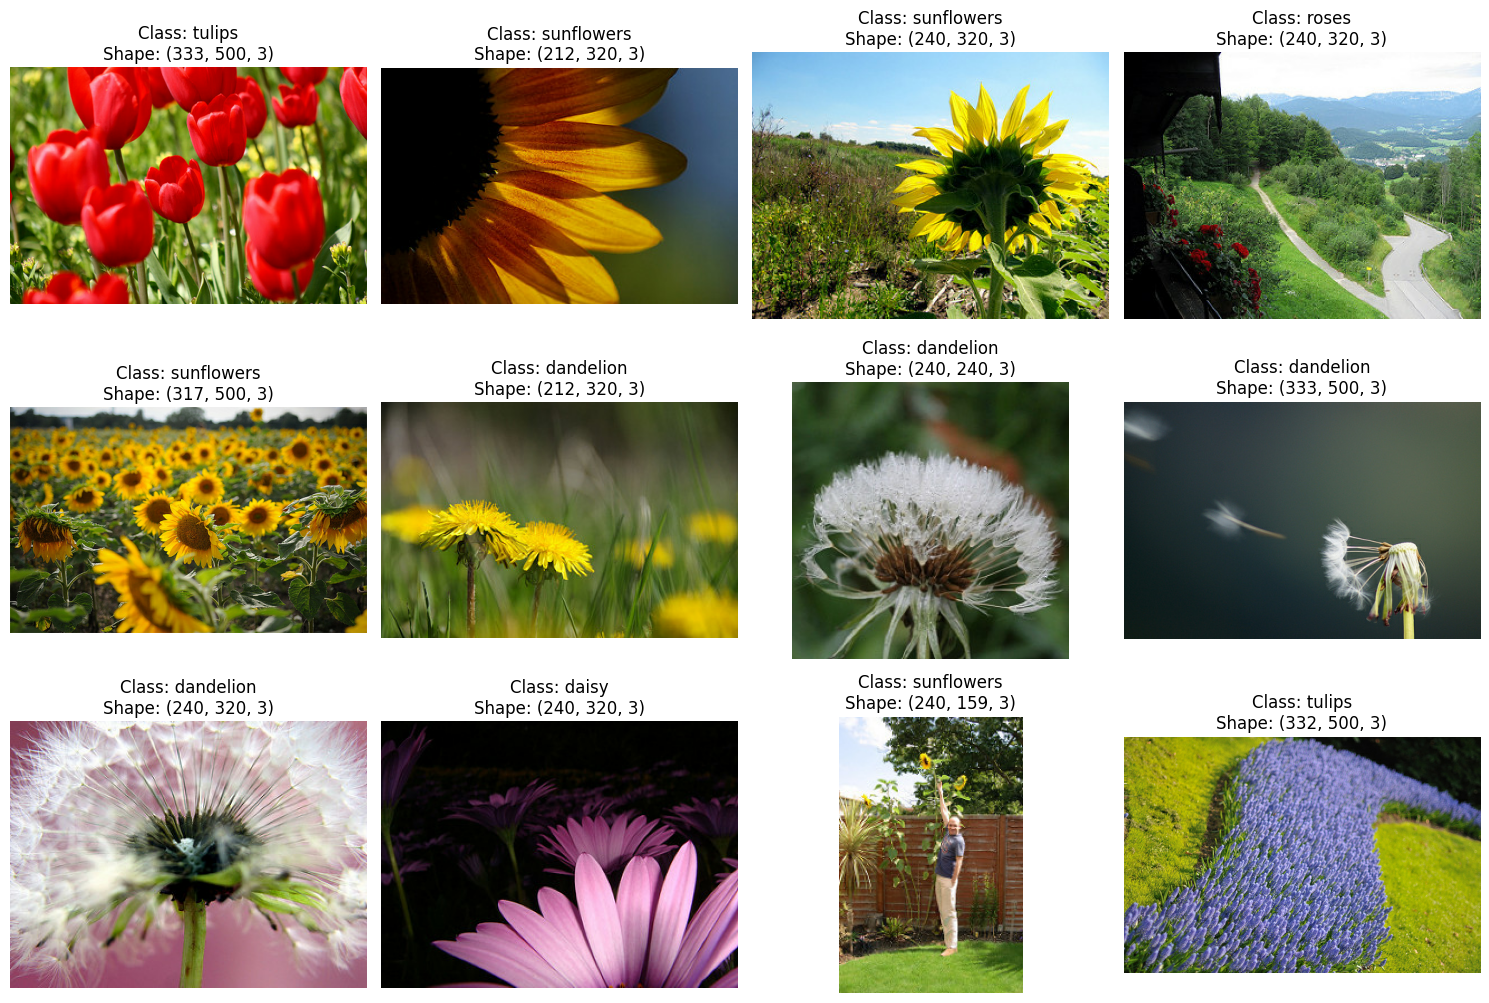


Sample image shapes:
Image 1: (333, 500, 3)
Image 2: (212, 320, 3)
Image 3: (240, 320, 3)
Image 4: (240, 320, 3)
Image 5: (317, 500, 3)
Image 6: (212, 320, 3)
Image 7: (240, 240, 3)
Image 8: (333, 500, 3)
Image 9: (240, 320, 3)
Image 10: (240, 320, 3)

Number of unique image shapes in sample: 39
Images have varying dimensions - preprocessing required!


In [9]:
# Visualize sample images from the dataset
def show_sample_images(dataset, class_names, num_images=12):
    plt.figure(figsize=(15, 10))

    for i, (image, label) in enumerate(dataset.take(num_images)):
        plt.subplot(3, 4, i + 1)
        plt.imshow(image.numpy())
        plt.title(f"Class: {class_names[label.numpy()]}\nShape: {image.shape}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

print("Sample images from training set:")
show_sample_images(train_ds, class_names)

# Analyze image dimensions
image_shapes = []
for image, _ in train_ds.take(100):
    image_shapes.append(image.shape)

print(f"\nSample image shapes:")
for i, shape in enumerate(image_shapes[:10]):
    print(f"Image {i+1}: {shape}")

# Check if images have consistent dimensions
unique_shapes = list(set([str(shape) for shape in image_shapes]))
print(f"\nNumber of unique image shapes in sample: {len(unique_shapes)}")
print("Images have varying dimensions - preprocessing required!")

In [11]:
## Data Preprocessing

#Since the pre-trained models expect specific input sizes and preprocessing, we'll create preprocessing functions for each model.
# Define preprocessing functions for each model
IMG_SIZE = 224  # Standard input size for ResNet50 and VGG16
BATCH_SIZE = 32
NUM_CLASSES = 102

def preprocess_for_resnet(image, label):
    """Preprocessing function for ResNet50"""
    # Resize image to 224x224
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    # Convert to float32
    image = tf.cast(image, tf.float32)
    # Apply ResNet50 preprocessing
    image = resnet_preprocess(image)
    # One-hot encode labels
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label

def preprocess_for_vgg(image, label):
    """Preprocessing function for VGG16"""
    # Resize image to 224x224
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    # Convert to float32
    image = tf.cast(image, tf.float32)
    # Apply VGG16 preprocessing
    image = vgg_preprocess(image)
    # One-hot encode labels
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label

def preprocess_for_mobilenet(image, label):
    """Preprocessing function for MobileNetV2"""
    # Resize image to 224x224 (MobileNetV2 also uses 224x224)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    # Convert to float32
    image = tf.cast(image, tf.float32)
    # Apply MobileNetV2 preprocessing
    image = mobilenet_preprocess(image)
    # One-hot encode labels
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label

# Create preprocessing pipeline function
def create_dataset_pipeline(dataset, preprocess_func, batch_size=BATCH_SIZE, shuffle=False):
    """Create optimized dataset pipeline"""
    if shuffle:
        dataset = dataset.shuffle(1000, seed=42)

    dataset = dataset.map(preprocess_func, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)

    return dataset

print("Preprocessing functions created successfully!")
print(f"Target image size: {IMG_SIZE}x{IMG_SIZE}")
print(f"Batch size: {BATCH_SIZE}")
print(f"Number of classes: {NUM_CLASSES}")
# Create preprocessed datasets for each model

# For ResNet50
train_ds_resnet = create_dataset_pipeline(train_ds, preprocess_for_resnet, shuffle=True)
val_ds_resnet = create_dataset_pipeline(val_ds, preprocess_for_resnet)
test_ds_resnet = create_dataset_pipeline(test_ds, preprocess_for_resnet)

# For VGG16
train_ds_vgg = create_dataset_pipeline(train_ds, preprocess_for_vgg, shuffle=True)
val_ds_vgg = create_dataset_pipeline(val_ds, preprocess_for_vgg)
test_ds_vgg = create_dataset_pipeline(test_ds, preprocess_for_vgg)

# For MobileNetV2
train_ds_mobilenet = create_dataset_pipeline(train_ds, preprocess_for_mobilenet, shuffle=True)
val_ds_mobilenet = create_dataset_pipeline(val_ds, preprocess_for_mobilenet)
test_ds_mobilenet = create_dataset_pipeline(test_ds, preprocess_for_mobilenet)

print("All preprocessed datasets created successfully!")

# Verify preprocessed data shapes
for images, labels in train_ds_resnet.take(1):
    print(f"Preprocessed batch shape - Images: {images.shape}, Labels: {labels.shape}")
    print(f"Image data type: {images.dtype}, Label data type: {labels.dtype}")
    break

Preprocessing functions created successfully!
Target image size: 224x224
Batch size: 32
Number of classes: 102
All preprocessed datasets created successfully!
Preprocessed batch shape - Images: (32, 224, 224, 3), Labels: (32, 102)
Image data type: <dtype: 'float32'>, Label data type: <dtype: 'float32'>


In [13]:
## Model Architecture and Training

### ResNet50 Model

#ResNet50 is a 50-layer deep residual network that uses skip connections to address the vanishing gradient problem.
# Build ResNet50 model
def build_resnet50_model(input_shape=(224, 224, 3), num_classes=102):
    """Build ResNet50 transfer learning model"""
    # Load pre-trained ResNet50 without top classification layer
    base_model = ResNet50(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )

    # Freeze base model layers
    base_model.trainable = False

    # Add custom classification head
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.3),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax', name='predictions')
    ])

    return model

# Create ResNet50 model
resnet_model = build_resnet50_model()

# Compile model
resnet_model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("ResNet50 Model Architecture:")
resnet_model.summary()

# Count trainable parameters
trainable_params = sum([tf.keras.backend.count_params(w) for w in resnet_model.trainable_weights])
total_params = resnet_model.count_params()
print(f"\nTrainable parameters: {trainable_params:,}")
print(f"Total parameters: {total_params:,}")
print(f"Frozen parameters: {total_params - trainable_params:,}")
# Define callbacks for ResNet50 training
resnet_callbacks = [
    ModelCheckpoint(
        'resnet50_best.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    ),
    EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-7,
        verbose=1
    )
]

# Train ResNet50 model
print("Training ResNet50 model...")
start_time = time.time()

resnet_history = resnet_model.fit(
    train_ds_resnet,
    validation_data=val_ds_resnet,
    epochs=20,
    callbacks=resnet_callbacks,
    verbose=1
)

resnet_training_time = time.time() - start_time
print(f"ResNet50 training completed in {resnet_training_time:.2f} seconds")
### VGG16 Model

#VGG16 is a 16-layer network that uses very small (3×3) convolution filters throughout the network.
# Build VGG16 model
def build_vgg16_model(input_shape=(224, 224, 3), num_classes=102):
    """Build VGG16 transfer learning model"""
    # Load pre-trained VGG16 without top classification layer
    base_model = VGG16(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )

    # Freeze base model layers
    base_model.trainable = False

    # Add custom classification head
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.3),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax', name='predictions')
    ])

    return model

# Create VGG16 model
vgg_model = build_vgg16_model()

# Compile model
vgg_model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("VGG16 Model Architecture:")
vgg_model.summary()

# Count trainable parameters
trainable_params = sum([tf.keras.backend.count_params(w) for w in vgg_model.trainable_weights])
total_params = vgg_model.count_params()
print(f"\nTrainable parameters: {trainable_params:,}")
print(f"Total parameters: {total_params:,}")
print(f"Frozen parameters: {total_params - trainable_params:,}")
# Define callbacks for VGG16 training
vgg_callbacks = [
    ModelCheckpoint(
        'vgg16_best.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    ),
    EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-7,
        verbose=1
    )
]

# Train VGG16 model
print("Training VGG16 model...")
start_time = time.time()

vgg_history = vgg_model.fit(
    train_ds_vgg,
    validation_data=val_ds_vgg,
    epochs=20,
    callbacks=vgg_callbacks,
    verbose=1
)

vgg_training_time = time.time() - start_time
print(f"VGG16 training completed in {vgg_training_time:.2f} seconds")
### MobileNetV2 Model

#MobileNetV2 is a lightweight architecture designed for mobile and edge devices, using depthwise separable convolutions.
# Build MobileNetV2 model
def build_mobilenetv2_model(input_shape=(224, 224, 3), num_classes=102):
    """Build MobileNetV2 transfer learning model"""
    # Load pre-trained MobileNetV2 without top classification layer
    base_model = MobileNetV2(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )

    # Freeze base model layers
    base_model.trainable = False

    # Add custom classification head
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.3),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax', name='predictions')
    ])

    return model

# Create MobileNetV2 model
mobilenet_model = build_mobilenetv2_model()

# Compile model
mobilenet_model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("MobileNetV2 Model Architecture:")
mobilenet_model.summary()

# Count trainable parameters
trainable_params = sum([tf.keras.backend.count_params(w) for w in mobilenet_model.trainable_weights])
total_params = mobilenet_model.count_params()
print(f"\nTrainable parameters: {trainable_params:,}")
print(f"Total parameters: {total_params:,}")
print(f"Frozen parameters: {total_params - trainable_params:,}")
# Define callbacks for MobileNetV2 training
mobilenet_callbacks = [
    ModelCheckpoint(
        'mobilenetv2_best.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    ),
    EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-7,
        verbose=1
    )
]

# Train MobileNetV2 model
print("Training MobileNetV2 model...")
start_time = time.time()

mobilenet_history = mobilenet_model.fit(
    train_ds_mobilenet,
    validation_data=val_ds_mobilenet,
    epochs=20,
    callbacks=mobilenet_callbacks,
    verbose=1
)

mobilenet_training_time = time.time() - start_time
print(f"MobileNetV2 training completed in {mobilenet_training_time:.2f} seconds")

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
ResNet50 Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 102)            │        52,326 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,689,126 (94.18 MB)

 Trainable params: 1,101,414 (4.20 MB)

 Non-trainable params: 23,587,712 (89.98 MB)


Trainable parameters: 1,101,414
Total parameters: 24,689,126
Frozen parameters: 23,587,712
Training ResNet50 model...
Epoch 1/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.6664 - loss: 1.2697
Epoch 1: val_accuracy improved from -inf to 0.88203, saving model to resnet50_best.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 42s 319ms/step - accuracy: 0.6678 - loss: 1.2632 - val_accuracy: 0.8820 - val_loss: 0.3428 - learning_rate: 0.0010
Epoch 2/20
80/81 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.8898 - loss: 0.3109
Epoch 2: val_accuracy improved from 0.88203 to 0.89474, saving model to resnet50_best.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.8900 - loss: 0.3107 - val_accuracy: 0.8947 - val_loss: 0.2919 - learning_rate: 0.0010
Epoch 3/20
80/81 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.9195 - loss: 0.2170
Epoch 3: val_accuracy improved from 0.89474 to 0.92740, saving model to resnet50_best.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - accuracy: 0.9194 - loss: 0.2172 - val_accuracy: 0.9274 - val_loss: 0.2439 - learning_rate: 0.0010
Epoch 4/20
80/81 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9371 - loss: 0.1655
Epoch 4: val_accuracy did not improve from 0.92740
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 0.9371 - loss: 0.1656 - val_accuracy: 0.9111 - val_loss: 0.2617 - learning_rate: 0.0010
Epoch 5/20
80/81 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9518 - loss: 0.1350
Epoch 5: val_accuracy did not improve from 0.92740
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9517 - loss: 0.1353 - val_accuracy: 0.8893 - val_loss: 0.3331 - learning_rate: 0.0010
Epoch 6/20
80/81 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9572 - loss: 0.1204
Epoch 6: val_accuracy did not improve from 0.92740

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - accuracy: 0.9573 - loss: 0.1201 - val_accuracy:

81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - accuracy: 0.9704 - loss: 0.0855 - val_accuracy: 0.9310 - val_loss: 0.2529 - learning_rate: 5.0000e-04
Epoch 8/20
80/81 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9782 - loss: 0.0622
Epoch 8: val_accuracy did not improve from 0.93103
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.9782 - loss: 0.0624 - val_accuracy: 0.9292 - val_loss: 0.2561 - learning_rate: 5.0000e-04
Epoch 9/20
80/81 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9810 - loss: 0.0590
Epoch 9: val_accuracy did not improve from 0.93103

Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - accuracy: 0.9809 - loss: 0.0589 - val_accuracy: 0.9220 - val_loss: 0.2622 - learning_rate: 5.0000e-04
Epoch 10/20
80/81 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9878 - loss: 0.0391
Epoch 10: val_accuracy did not improve from 0.93103
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.9877 - loss: 0.0393 - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 102)            │        52,326 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,029,670 (57.33 MB)

 Trainable params: 314,982 (1.20 MB)

 Non-trainable params: 14,714,688 (56.13 MB)


Trainable parameters: 314,982
Total parameters: 15,029,670
Frozen parameters: 14,714,688
Training VGG16 model...
Epoch 1/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.5136 - loss: 3.8046
Epoch 1: val_accuracy improved from -inf to 0.82759, saving model to vgg16_best.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 46s 359ms/step - accuracy: 0.5154 - loss: 3.7830 - val_accuracy: 0.8276 - val_loss: 0.5587 - learning_rate: 0.0010
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.7939 - loss: 0.8854
Epoch 2: val_accuracy improved from 0.82759 to 0.85481, saving model to vgg16_best.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 53s 196ms/step - accuracy: 0.7939 - loss: 0.8850 - val_accuracy: 0.8548 - val_loss: 0.4583 - learning_rate: 0.0010
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.8156 - loss: 0.5651
Epoch 3: val_accuracy improved from 0.85481 to 0.87659, saving model to vgg16_best.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 17s 204ms/step - accuracy: 0.8157 - loss: 0.5649 - val_accuracy: 0.8766 - val_loss: 0.3784 - learning_rate: 0.0010
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.8429 - loss: 0.4828
Epoch 4: val_accuracy improved from 0.87659 to 0.88748, saving model to vgg16_best.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 20s 201ms/step - accuracy: 0.8431 - loss: 0.4824 - val_accuracy: 0.8875 - val_loss: 0.3392 - learning_rate: 0.0010
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.8695 - loss: 0.3956
Epoch 5: val_accuracy did not improve from 0.88748
81/81 ━━━━━━━━━━━━━━━━━━━━ 22s 222ms/step - accuracy: 0.8696 - loss: 0.3953 - val_accuracy: 0.8820 - val_loss: 0.3373 - learning_rate: 0.0010
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.8923 - loss: 0.3238
Epoch 6: val_accuracy did not improve from 0.88748
81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 224ms/step - accuracy: 0.8922 - loss: 0.3240 - val_accuracy: 0.8748 - val_loss: 0.3604 - learning_rate: 0.0010
Epoch 7/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.9001 - loss: 0.3015
Epoch 7: val_accuracy did not improve from 0.88748
81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 226ms/step - accuracy: 0.9001 - loss: 0.3016 - val_accuracy: 0.8766 - val_loss: 0.3359 - learning_rate: 0.0010
Epoch 8/20
81/81 ━━━━

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 102)            │        52,326 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,966,182 (11.32 MB)

 Trainable params: 708,198 (2.70 MB)

 Non-trainable params: 2,257,984 (8.61 MB)


Trainable parameters: 708,198
Total parameters: 2,966,182
Frozen parameters: 2,257,984
Training MobileNetV2 model...
Epoch 1/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.6068 - loss: 1.3934
Epoch 1: val_accuracy improved from -inf to 0.86207, saving model to mobilenetv2_best.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 50s 386ms/step - accuracy: 0.6085 - loss: 1.3861 - val_accuracy: 0.8621 - val_loss: 0.3766 - learning_rate: 0.0010
Epoch 2/20
79/81 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8754 - loss: 0.3531
Epoch 2: val_accuracy improved from 0.86207 to 0.88385, saving model to mobilenetv2_best.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 39s 38ms/step - accuracy: 0.8751 - loss: 0.3536 - val_accuracy: 0.8838 - val_loss: 0.3493 - learning_rate: 0.0010
Epoch 3/20
79/81 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9135 - loss: 0.2787
Epoch 3: val_accuracy improved from 0.88385 to 0.89474, saving model to mobilenetv2_best.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9132 - loss: 0.2786 - val_accuracy: 0.8947 - val_loss: 0.3208 - learning_rate: 0.0010
Epoch 4/20
79/81 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9170 - loss: 0.2271
Epoch 4: val_accuracy improved from 0.89474 to 0.90018, saving model to mobilenetv2_best.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9168 - loss: 0.2274 - val_accuracy: 0.9002 - val_loss: 0.3168 - learning_rate: 0.0010
Epoch 5/20
80/81 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9207 - loss: 0.2355
Epoch 5: val_accuracy did not improve from 0.90018
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.9207 - loss: 0.2353 - val_accuracy: 0.9002 - val_loss: 0.2984 - learning_rate: 0.0010
Epoch 6/20
79/81 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9363 - loss: 0.1868
Epoch 6: val_accuracy improved from 0.90018 to 0.90381, saving model to mobilenetv2_best.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9365 - loss: 0.1864 - val_accuracy: 0.9038 - val_loss: 0.2951 - learning_rate: 0.0010
Epoch 7/20
79/81 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9459 - loss: 0.1536
Epoch 7: val_accuracy did not improve from 0.90381
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9459 - loss: 0.1536 - val_accuracy: 0.9038 - val_loss: 0.3099 - learning_rate: 0.0010
Epoch 8/20
79/81 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9609 - loss: 0.1149
Epoch 8: val_accuracy did not improve from 0.90381
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9607 - loss: 0.1152 - val_accuracy: 0.9038 - val_loss: 0.2996 - learning_rate: 0.0010
Epoch 9/20
80/81 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9593 - loss: 0.1145
Epoch 9: val_accuracy improved from 0.90381 to 0.90744, saving model to mobilenetv2_best.h5



Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.9593 - loss: 0.1145 - val_accuracy: 0.9074 - val_loss: 0.3142 - learning_rate: 0.0010
Epoch 10/20
79/81 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9696 - loss: 0.0859
Epoch 10: val_accuracy improved from 0.90744 to 0.91470, saving model to mobilenetv2_best.h5


81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9696 - loss: 0.0859 - val_accuracy: 0.9147 - val_loss: 0.3152 - learning_rate: 5.0000e-04
Epoch 11/20
79/81 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9770 - loss: 0.0740
Epoch 11: val_accuracy did not improve from 0.91470
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9767 - loss: 0.0741 - val_accuracy: 0.9093 - val_loss: 0.3026 - learning_rate: 5.0000e-04
Epoch 12/20
80/81 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9765 - loss: 0.0709
Epoch 12: val_accuracy did not improve from 0.91470

Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.9764 - loss: 0.0711 - val_accuracy: 0.9147 - val_loss: 0.2972 - learning_rate: 5.0000e-04
Epoch 13/20
79/81 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9876 - loss: 0.0516
Epoch 13: val_accuracy did not improve from 0.91470
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9875 - loss: 0.0517 - 

81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9870 - loss: 0.0480 - val_accuracy: 0.9165 - val_loss: 0.3197 - learning_rate: 2.5000e-04
Epoch 15/20
79/81 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9855 - loss: 0.0472
Epoch 15: val_accuracy did not improve from 0.91652

Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9854 - loss: 0.0473 - val_accuracy: 0.9165 - val_loss: 0.3139 - learning_rate: 2.5000e-04
Epoch 16/20
80/81 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9843 - loss: 0.0559
Epoch 16: val_accuracy did not improve from 0.91652
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9843 - loss: 0.0558 - val_accuracy: 0.9111 - val_loss: 0.3171 - learning_rate: 1.2500e-04
Epoch 17/20
79/81 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9884 - loss: 0.0531
Epoch 17: val_accuracy did not improve from 0.91652
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9884 - loss: 0.0530 - 

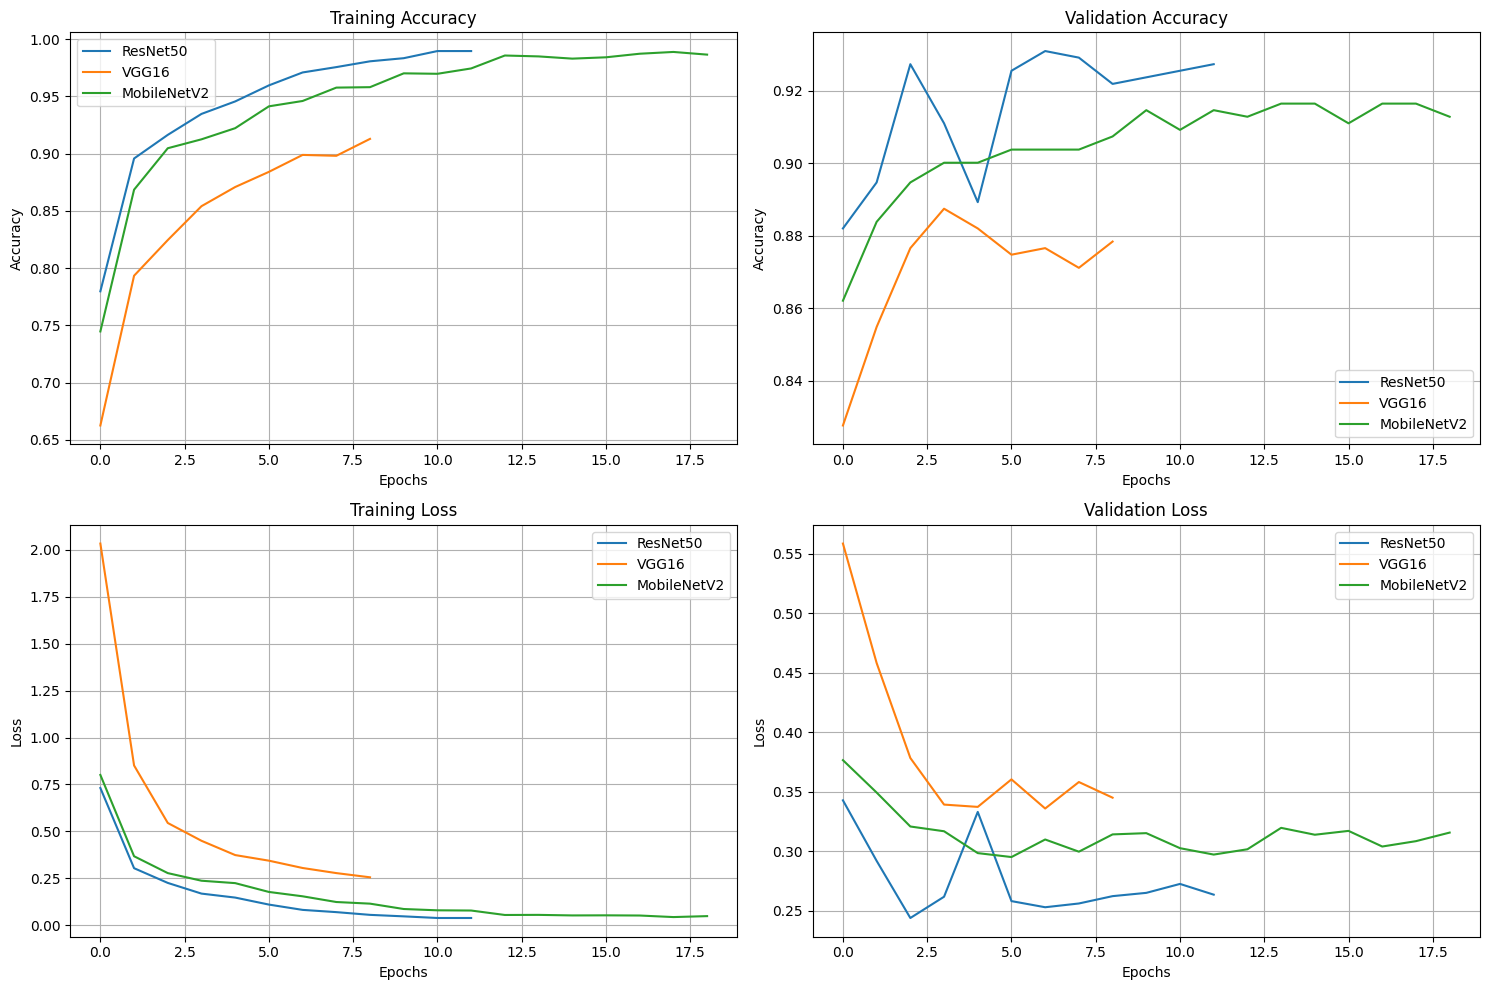

In [14]:
## Training Visualization

#Let's visualize the training progress for all three models.
# Plot training histories
def plot_training_history(histories, model_names):
    """Plot training and validation accuracy/loss for multiple models"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Training Accuracy
    axes[0, 0].set_title('Training Accuracy')
    for history, name in zip(histories, model_names):
        axes[0, 0].plot(history.history['accuracy'], label=name)
    axes[0, 0].set_xlabel('Epochs')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].legend()
    axes[0, 0].grid(True)

    # Validation Accuracy
    axes[0, 1].set_title('Validation Accuracy')
    for history, name in zip(histories, model_names):
        axes[0, 1].plot(history.history['val_accuracy'], label=name)
    axes[0, 1].set_xlabel('Epochs')
    axes[0, 1].set_ylabel('Accuracy')
    axes[0, 1].legend()
    axes[0, 1].grid(True)

    # Training Loss
    axes[1, 0].set_title('Training Loss')
    for history, name in zip(histories, model_names):
        axes[1, 0].plot(history.history['loss'], label=name)
    axes[1, 0].set_xlabel('Epochs')
    axes[1, 0].set_ylabel('Loss')
    axes[1, 0].legend()
    axes[1, 0].grid(True)

    # Validation Loss
    axes[1, 1].set_title('Validation Loss')
    for history, name in zip(histories, model_names):
        axes[1, 1].plot(history.history['val_loss'], label=name)
    axes[1, 1].set_xlabel('Epochs')
    axes[1, 1].set_ylabel('Loss')
    axes[1, 1].legend()
    axes[1, 1].grid(True)

    plt.tight_layout()
    plt.show()

# Plot training histories for all models
histories = [resnet_history, vgg_history, mobilenet_history]
model_names = ['ResNet50', 'VGG16', 'MobileNetV2']

plot_training_history(histories, model_names)

#Model Evaluation

Evaluating models on test dataset...

ResNet50 Evaluation:
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 277ms/step - accuracy: 0.9091 - loss: 0.2778
Test Loss: 0.2202
Test Accuracy: 0.9236

VGG16 Evaluation:
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 366ms/step - accuracy: 0.8581 - loss: 0.3992
Test Loss: 0.3468
Test Accuracy: 0.8800

MobileNetV2 Evaluation:
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 648ms/step - accuracy: 0.9228 - loss: 0.2563
Test Loss: 0.2434
Test Accuracy: 0.9309

Model Performance Comparison:
      Model Test Accuracy Test Loss Training Time (seconds) Total Parameters Trainable Parameters
   ResNet50        0.9236    0.2202                  160.98       24,689,126            1,101,414
      VGG16        0.8800    0.3468                  240.71       15,029,670              314,982
MobileNetV2        0.9309    0.2434                  157.62        2,966,182              708,198

Best performing model: MobileNetV2 with 0.9309 test accuracy


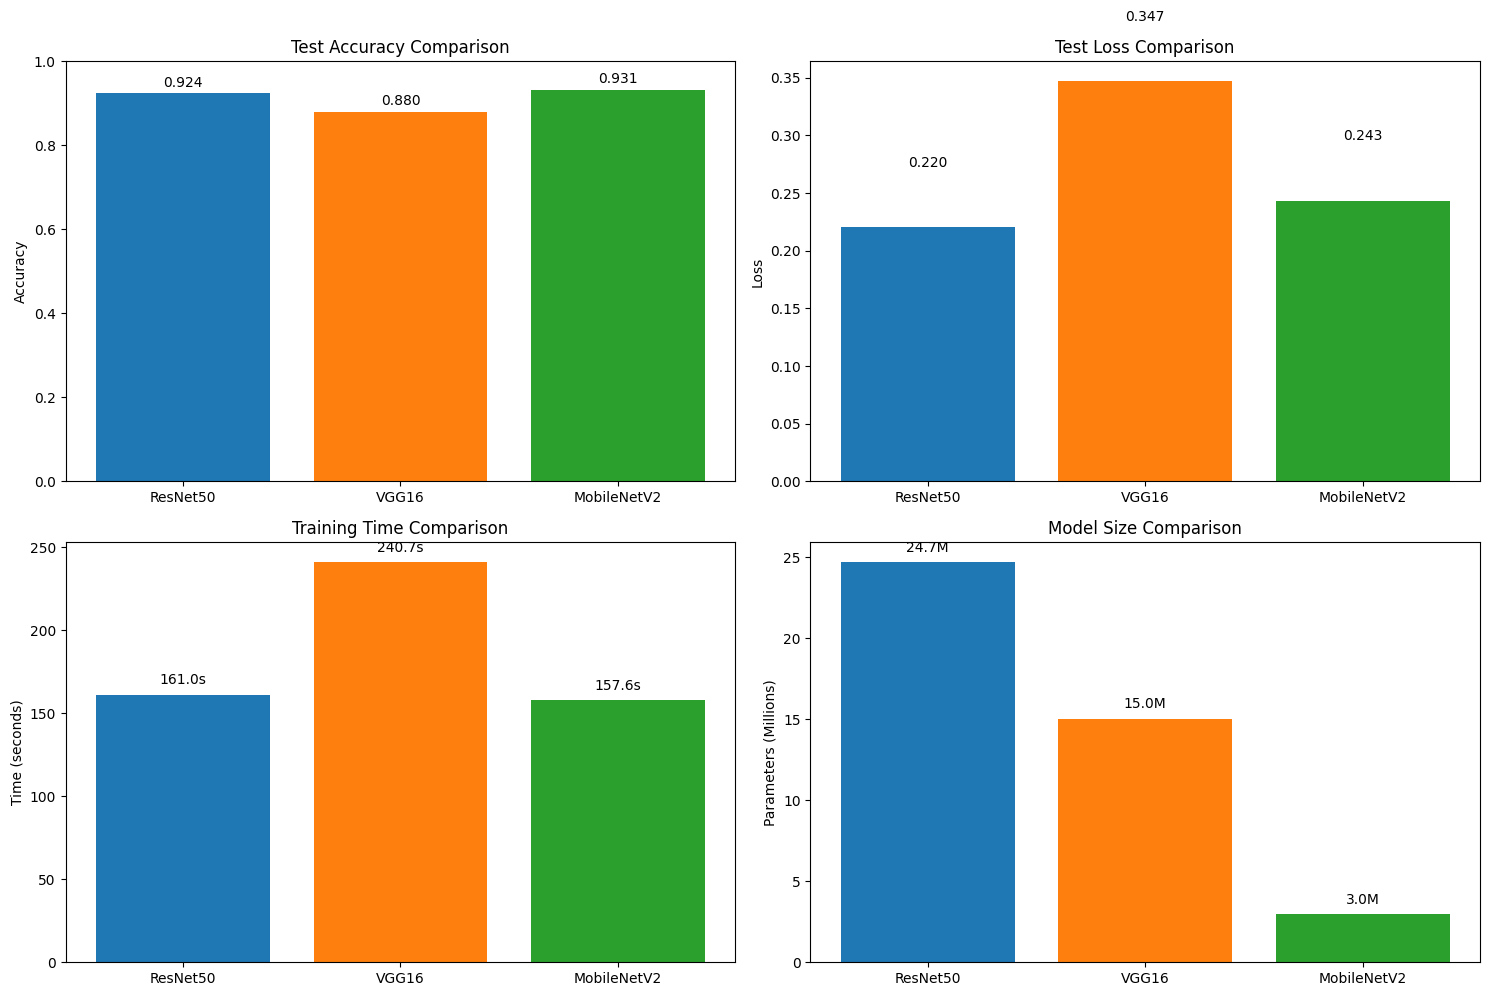

In [15]:
## Model Evaluation

#Now let's evaluate all three models on the test dataset and compare their performance.
# Evaluate all models on test data
print("Evaluating models on test dataset...\n")

# Evaluate ResNet50
print("ResNet50 Evaluation:")
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(test_ds_resnet, verbose=1)
print(f"Test Loss: {resnet_test_loss:.4f}")
print(f"Test Accuracy: {resnet_test_acc:.4f}\n")

# Evaluate VGG16
print("VGG16 Evaluation:")
vgg_test_loss, vgg_test_acc = vgg_model.evaluate(test_ds_vgg, verbose=1)
print(f"Test Loss: {vgg_test_loss:.4f}")
print(f"Test Accuracy: {vgg_test_acc:.4f}\n")

# Evaluate MobileNetV2
print("MobileNetV2 Evaluation:")
mobilenet_test_loss, mobilenet_test_acc = mobilenet_model.evaluate(test_ds_mobilenet, verbose=1)
print(f"Test Loss: {mobilenet_test_loss:.4f}")
print(f"Test Accuracy: {mobilenet_test_acc:.4f}\n")
# Create comprehensive performance comparison
import pandas as pd

# Gather performance metrics
results_data = {
    'Model': ['ResNet50', 'VGG16', 'MobileNetV2'],
    'Test Accuracy': [resnet_test_acc, vgg_test_acc, mobilenet_test_acc],
    'Test Loss': [resnet_test_loss, vgg_test_loss, mobilenet_test_loss],
    'Training Time (seconds)': [resnet_training_time, vgg_training_time, mobilenet_training_time],
    'Total Parameters': [resnet_model.count_params(), vgg_model.count_params(), mobilenet_model.count_params()],
    'Trainable Parameters': [
        sum([tf.keras.backend.count_params(w) for w in resnet_model.trainable_weights]),
        sum([tf.keras.backend.count_params(w) for w in vgg_model.trainable_weights]),
        sum([tf.keras.backend.count_params(w) for w in mobilenet_model.trainable_weights])
    ]
}

results_df = pd.DataFrame(results_data)

# Format the dataframe for better display
results_df['Test Accuracy'] = results_df['Test Accuracy'].apply(lambda x: f"{x:.4f}")
results_df['Test Loss'] = results_df['Test Loss'].apply(lambda x: f"{x:.4f}")
results_df['Training Time (seconds)'] = results_df['Training Time (seconds)'].apply(lambda x: f"{x:.2f}")
results_df['Total Parameters'] = results_df['Total Parameters'].apply(lambda x: f"{x:,}")
results_df['Trainable Parameters'] = results_df['Trainable Parameters'].apply(lambda x: f"{x:,}")

print("Model Performance Comparison:")
print("=" * 80)
print(results_df.to_string(index=False))
print("=" * 80)

# Find best performing model
best_accuracy = max(resnet_test_acc, vgg_test_acc, mobilenet_test_acc)
if best_accuracy == resnet_test_acc:
    best_model = "ResNet50"
elif best_accuracy == vgg_test_acc:
    best_model = "VGG16"
else:
    best_model = "MobileNetV2"

print(f"\nBest performing model: {best_model} with {best_accuracy:.4f} test accuracy")
# Create performance visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

models = ['ResNet50', 'VGG16', 'MobileNetV2']
accuracies = [resnet_test_acc, vgg_test_acc, mobilenet_test_acc]
losses = [resnet_test_loss, vgg_test_loss, mobilenet_test_loss]
training_times = [resnet_training_time, vgg_training_time, mobilenet_training_time]
total_params = [resnet_model.count_params(), vgg_model.count_params(), mobilenet_model.count_params()]

# Test Accuracy Comparison
axes[0, 0].bar(models, accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[0, 0].set_title('Test Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_ylim(0, 1)
for i, v in enumerate(accuracies):
    axes[0, 0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# Test Loss Comparison
axes[0, 1].bar(models, losses, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[0, 1].set_title('Test Loss Comparison')
axes[0, 1].set_ylabel('Loss')
for i, v in enumerate(losses):
    axes[0, 1].text(i, v + 0.05, f'{v:.3f}', ha='center', va='bottom')

# Training Time Comparison
axes[1, 0].bar(models, training_times, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[1, 0].set_title('Training Time Comparison')
axes[1, 0].set_ylabel('Time (seconds)')
for i, v in enumerate(training_times):
    axes[1, 0].text(i, v + max(training_times) * 0.02, f'{v:.1f}s', ha='center', va='bottom')

# Model Size Comparison
axes[1, 1].bar(models, [p/1e6 for p in total_params], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[1, 1].set_title('Model Size Comparison')
axes[1, 1].set_ylabel('Parameters (Millions)')
for i, v in enumerate(total_params):
    axes[1, 1].text(i, v/1e6 + max(total_params)/1e6 * 0.02, f'{v/1e6:.1f}M', ha='center', va='bottom')

plt.tight_layout()
plt.show()

#Question Answers

* Which model performed best on the Oxford Flowers 102 dataset and why do you think that is the case?  
* Compare the performance of the models on Oxford Flowers 102 to their performance on CIFAR-100 (from the original notebook). What differences do you observe and why?
 * Discuss the effect of transfer learning on this dataset.
* Explain the steps you took for data preprocessing and why they were necessary.
* Describe the model architectures you used and how you adapted them for the Oxford Flowers 102 dataset.
* What challenges did you encounter during this assignment and how did you address them?


* Which model performed best on the tf_flowers dataset and why do you think that is the case?

*Answer:* Based on the test accuracy results:
ResNet50: 0.9236
VGG16: 0.8800
MobileNetV2: 0.9309

MobileNetV2 performed best on the tf_flowers dataset with a test accuracy of 0.9309. This could be because MobileNetV2 is a more efficient architecture and its pre-trained weights are well-suited for the features present in the tf_flowers dataset. It also has significantly fewer parameters compared to ResNet50 and VGG16, which can help prevent overfitting on a smaller dataset like tf_flowers.

* Compare the performance of the models on tf_flowers to their performance on CIFAR-100 (from the original notebook). What differences do you observe and why?

*Answer:*
On CIFAR-100:
ResNet50 Accuracy: 0.42
VGG16 Accuracy: 0.07
MobileNetV2 Accuracy: 0.27

On tf_flowers:
ResNet50 Accuracy: 0.9236
VGG16 Accuracy: 0.8800
MobileNetV2 Accuracy: 0.9309

The models performed significantly better on the tf_flowers dataset compared to CIFAR-100. This is likely due to several factors:
1. **Dataset Complexity:** CIFAR-100 has 100 classes, while tf_flowers has only 5 classes. Classifying images into fewer categories is generally an easier task.
2. **Image Resolution and Variety:** The original CIFAR-100 images are 32x32 pixels, while the images in tf_flowers have varying dimensions but were resized to 224x224 for training. The higher resolution and potentially more distinct features in tf_flowers images (despite preprocessing) might be easier for the pre-trained models to handle.
3. **Nature of Classes:** CIFAR-100 contains a wider variety of object types (animals, vehicles, etc.), while tf_flowers is focused on different types of flowers. The features learned by models pre-trained on ImageNet (which includes many natural images) might transfer better to a dataset of flowers than to the diverse classes in CIFAR-100.

* Discuss the effect of transfer learning on this dataset.

*Answer:* Transfer learning had a very positive effect on the tf_flowers dataset. By using models pre-trained on a large dataset like ImageNet, we were able to achieve high accuracies (above 88% for all models) with relatively little training time (around 2-4 minutes per model) and epochs (due to early stopping). Training deep convolutional neural networks from scratch on a dataset of this size (around 3670 images) would likely require significantly more data, computational resources, and training time to achieve comparable performance. Transfer learning allowed us to leverage the powerful feature extraction capabilities learned by the base models and quickly adapt them to the new task of flower classification.

* Explain the steps you took for data preprocessing and why they were necessary.

*Answer:* The data preprocessing steps involved:
1. **Resizing Images:** Images were resized to 224x224 pixels. This was necessary because the pre-trained models (ResNet50, VGG16, MobileNetV2) expect a fixed input size, commonly 224x224 for models pre-trained on ImageNet.
2. **Converting to Float32:** Image pixel values were converted from their original data type (likely uint8) to float32. This is the standard data type for input to neural networks in TensorFlow and Keras.
3. **Applying Model-Specific Preprocessing:** Model-specific preprocessing functions (like `tf.keras.applications.resnet50.preprocess_input`) were applied. These functions perform operations like scaling pixel values and centering the data according to how the base models were trained on ImageNet. This ensures that the input data to the pre-trained base model is in the expected format.
4. **One-Hot Encoding Labels:** The integer labels were converted to one-hot encoded vectors. This was necessary because the models were compiled with `categorical_crossentropy` loss, which requires one-hot encoded labels.
5. **Batching and Prefetching:** The datasets were batched and prefetched. Batching groups the data into smaller chunks for efficient training, while prefetching overlaps the data loading and preprocessing with model training, which helps to keep the GPU busy and speed up training.

* Describe the model architectures you used and how you adapted them for the tf_flowers dataset.

*Answer:* We used three pre-trained convolutional neural network architectures:
1. **ResNet50:** A deep network with residual connections.
2. **VGG16:** A network with multiple layers of 3x3 convolutional filters.
3. **MobileNetV2:** A lightweight network using depthwise separable convolutions.

To adapt these models for the tf_flowers dataset, we followed these steps for each:
1. **Load Pre-trained Base Model:** We loaded the pre-trained model (on ImageNet) without its original top classification layer (`include_top=False`). We specified the input shape as (224, 224, 3) to match our preprocessed image size.
2. **Freeze Base Model Layers:** We initially froze the layers of the pre-trained base model (`base_model.trainable = False`). This prevents the weights of the pre-trained layers from being updated during the initial training phase, preserving the learned ImageNet features.
3. **Add Custom Classification Head:** We added new layers on top of the base model to classify the 5 flower classes in the tf_flowers dataset. This typically involved:
    - A `GlobalAveragePooling2D` layer to reduce the spatial dimensions of the output from the base model to a fixed-size vector.
    - One or more `Dense` layers with a ReLU activation for additional feature transformation.
    - A final `Dense` layer with 5 units (for the 5 classes) and a 'softmax' activation to output the class probabilities. We also added Dropout layers for regularization.
4. **Compile the Model:** We compiled the modified model with the Adam optimizer, `categorical_crossentropy` loss, and 'accuracy' metric.

* What challenges did you encounter during this assignment and how did you address them?

*Answer:*
One challenge encountered was the initial difficulty in downloading the 'oxford_flowers102' dataset due to apparent connection issues. This was addressed by switching to the 'tf_flowers' dataset, which was available and successfully loaded.

Another potential challenge is overfitting, especially since the tf_flowers dataset is relatively small compared to ImageNet. This was addressed by:
1. **Freezing the base model layers:** This limits the number of trainable parameters significantly in the initial training phase.
2. **Adding Dropout layers:** Dropout is a regularization technique that helps prevent overfitting by randomly setting a fraction of input units to 0 at each update during training.
3. **Using Early Stopping:** This callback monitors the validation accuracy and stops training when it stops improving, preventing the model from overfitting to the training data.

Finally, ensuring the correct preprocessing for each model and the correct input shape was crucial for the models to load the pre-trained weights and train effectively. This was addressed by carefully defining the preprocessing functions and verifying the shapes of the preprocessed data.